In [ ]:
%matplotlib inline

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a 3-layer fully connected network (FCN)

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

In [ ]:
accuracy_scores = []
loss_scores = []

In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()
model2 = Sequential()

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!
model2.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))
model2.add(Activation('relu'))

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))
model2.add(Dropout(0.2))

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))
model2.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))
model2.add(Activation('softmax'))

In [ ]:
# Summarize the built model

model.summary()

In [ ]:
# Let's use the sgd optimizer for learning

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1)

loss, accuracy = model.evaluate(X_test, Y_test)

accuracy_scores = history.history['accuracy']
loss_scores = history.history['loss']

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.2191 - accuracy: 0.6884
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.5322 - accuracy: 0.8498
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4268 - accuracy: 0.8749
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3772 - accuracy: 0.8903
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9254


In [ ]:
# Let's use the adam optimizer for learning

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1)

loss, accuracy = model2.evaluate(X_test, Y_test)

accuracy_scores2 = history.history['accuracy']
loss_scores2 = history.history['loss']

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2529 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1003 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0704 - accuracy: 0.9780
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0575 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9823


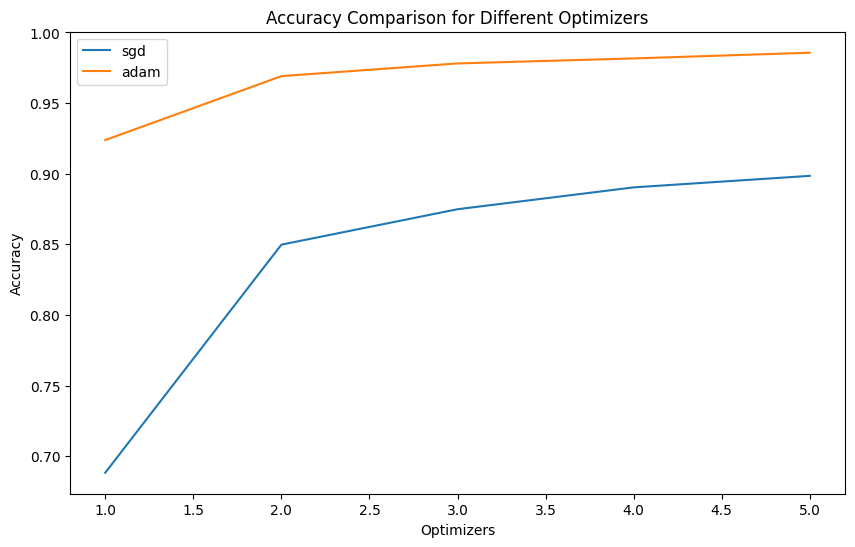

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5], accuracy_scores, label='sgd')
plt.plot([1,2,3,4,5], accuracy_scores2, label='adam')
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Optimizers')
plt.legend()
plt.show()